In [1]:
import numpy as np
import pandas as pd 
import pickle as p
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2
import depth_predictor as dp
import lidar_predictor as lp

C:\Users\claud\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


## Load Trainig data

In [2]:
data = p.load(open('robot_random_joint_depth_2.p', 'rb'))
data.columns

Index(['timestamp_lidar', 'lidar_data', 'timestamp_franka', 'joint_pos',
       'joint_vel', 'endeff_pos', 'timestamp_camera', 'dim_depth',
       'depth_img'],
      dtype='object')

In [3]:
original_joints = np.array(list(data['joint_pos'].values))
original_lidars = np.array(list(data['lidar_data'].values))
original_depth = np.array(list(data['depth_img'].values))

## Create & Train Classifier Objects

In [4]:
lidar_binning_params = {'max_value':1, 'bin_lenght':0.01 }
lidar_training_data={'joints':original_joints, 'lidar_data':original_lidars, 'epochs':5000, 
                     'binning_params':lidar_binning_params, 'model_name':'model_lidar_new'}
lidar_predictor = lp.lidar_predictor(binning_params=lidar_binning_params, train=True, training_data=lidar_training_data)

# load prexisting models via: 
#lidar_predictor = lp.lidar_predictor(binning_params=lidar_binning_params, 
#                                     model_names=['model_lidar_new{}.h5'.format(i) for i in range(9)], train=False)


training lidar 0

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

Training the depth predictor

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.............................................................

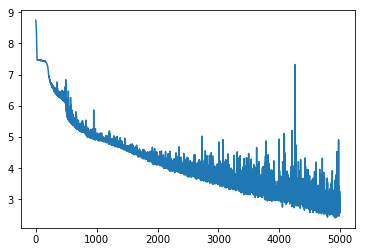

In [5]:
depth_training_data={'joints':original_joints, 'depth_images':original_depth, 'epochs':5000}
depth_predictor = dp.depth_predictor(model_name='depth_predictor.h5', train=True, training_data=depth_training_data)


## Test prediction on new dataset

In [11]:
test_data = p.load(open('robot_random_joint_depth.p', 'rb'))
test_joints = np.array(list(test_data['joint_pos'].values))
test_lidars = np.array(list(test_data['lidar_data'].values))
test_depth = np.array(list(test_data['depth_img'].values))

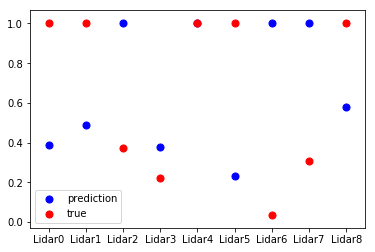

In [12]:
idx = 8
prediction = lidar_predictor.predict_single(joint_data=test_joints[idx, :], true_lidar=test_lidars[idx, :], plot = True)

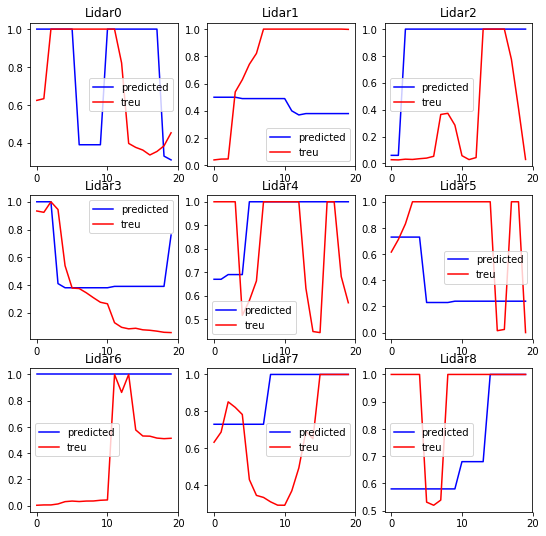

In [13]:
idx = 20
lid = lidar_predictor.predict_timeseries(joint_data=test_joints[:idx, :], true_lidar=test_lidars[:idx, :], plot = True)

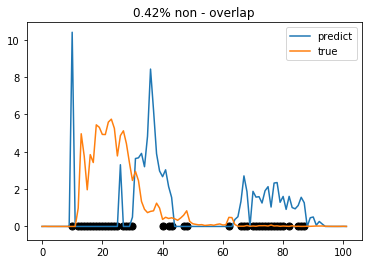

In [17]:
idx = 33
depth_predictor.predict_single(joints_raw=test_joints[idx,:], depth_img_raw=test_depth[idx, :])